In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
%matplotlib inline

In [2]:
clfs = {
    "Nearest Neighbors": KNeighborsClassifier(3),
    "Linear SVM": SVC(kernel="linear", C=0.025),
    "RBF SVM": SVC(gamma=2, C=1),
    "Decision Tree": DecisionTreeClassifier(max_depth=5),
    "Random Forest": RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    "AdaBoost": AdaBoostClassifier(),
    "Naive Bayes": GaussianNB(),
    "LDA": LinearDiscriminantAnalysis()}

In [3]:
dataset1 = pd.read_csv('dataset1.csv')
dataset2 = pd.read_csv('dataset2.csv')
dataset3 = pd.read_csv('dataset3.csv')

In [4]:
X1 = dataset1.loc[:,'X1':'X5']
y1 = dataset1['y']
X2 = dataset2.loc[:,'X1':'X5']
y2 = dataset2['y']
X3 = dataset3.loc[:,'X1':'X5']
y3 = dataset3['y']

In [5]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1,y1,test_size=0.3, random_state=42)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2,test_size=0.3, random_state=42)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3,y3,test_size=0.3, random_state=42)

In [6]:
data1 = [X_train1, X_test1, y_train1, y_test1]
data2 = [X_train2, X_test2, y_train2, y_test2]
data3 = [X_train3, X_test3, y_train3, y_test3]
data = [data1, data2, data3]

In [7]:
from sklearn import metrics

aucs = []
for dataset in data:
    aucs_per_dataset = []
    X_train = dataset[0]
    X_test = dataset[1]
    y_train = dataset[2]
    y_test = dataset[3]
    for name in clfs:
        clf = clfs.get(name)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
        aucs_per_dataset.append(metrics.auc(fpr, tpr))
    aucs.append(aucs_per_dataset)

In [8]:
aucs

[[0.825,
  0.5,
  0.825,
  0.7250000000000001,
  0.6750000000000002,
  0.8,
  0.625,
  0.475],
 [0.8616071428571428,
  0.7723214285714286,
  0.9017857142857143,
  0.8973214285714286,
  0.8660714285714286,
  0.8303571428571429,
  0.9017857142857143,
  0.9017857142857143],
 [0.9017857142857143,
  0.875,
  0.9017857142857143,
  0.8660714285714286,
  0.875,
  0.84375,
  0.90625,
  0.8035714285714286]]

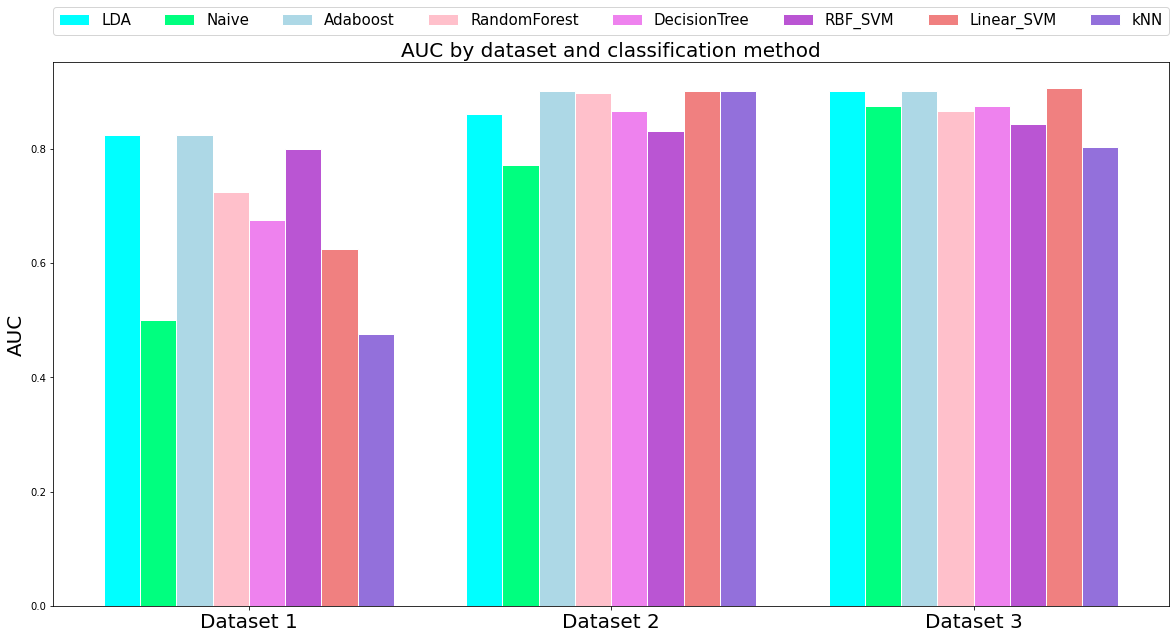

In [9]:
K_nearest = [aucs[0][0], aucs[1][0], aucs[2][0]]
Linear_SVM = [aucs[0][1], aucs[1][1], aucs[2][1]]
RBF_SVM = [aucs[0][2], aucs[1][2], aucs[2][2]]
Decision_Tree = [aucs[0][3], aucs[1][3], aucs[2][3]]
Random_Forest = [aucs[0][4], aucs[1][4], aucs[2][4]]
AdaBoost = [aucs[0][5], aucs[1][5], aucs[2][5]]
Naive_Bayes = [aucs[0][6], aucs[1][6], aucs[2][6]]
LDA = [aucs[0][7], aucs[1][7], aucs[2][7]]

plt.figure(figsize=(20,10))

barWidth = 0.1
r1 = np.arange(len(LDA))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
r6 = [x + barWidth for x in r5]
r7 = [x + barWidth for x in r6]
r8 = [x + barWidth for x in r7]


plt.bar(r1, K_nearest, color='cyan', width=barWidth, edgecolor='white', label='LDA')
plt.bar(r2, Linear_SVM, color='springgreen', width=barWidth, edgecolor='white', label='Naive')
plt.bar(r3, RBF_SVM, color='lightblue', width=barWidth, edgecolor='white', label='Adaboost')
plt.bar(r4, Decision_Tree, color='pink', width=barWidth, edgecolor='white', label='RandomForest')
plt.bar(r5, Random_Forest, color='violet', width=barWidth, edgecolor='white', label='DecisionTree')
plt.bar(r6, AdaBoost, color='mediumorchid', width=barWidth, edgecolor='white', label='RBF_SVM')
plt.bar(r7, Naive_Bayes, color='lightcoral', width=barWidth, edgecolor='white', label='Linear_SVM')
plt.bar(r8, LDA, color='mediumpurple', width=barWidth, edgecolor='white', label='kNN')

 
plt.ylabel('AUC', fontsize = 20)
plt.title('AUC by dataset and classification method', fontsize=20)
plt.xticks([r + 0.35 for r in range(len(LDA))], ['Dataset 1', 'Dataset 2', 'Dataset 3'], fontsize=20)
plt.legend(bbox_to_anchor=(0., 1.05, 1., .102),loc=3,ncol=8, mode="expand", borderaxespad=0., fontsize = 15)
plt.show()

# Applying PCA

In [10]:
pca1 = PCA(n_components=2)
pca2 = PCA(n_components=2)
pca3 = PCA(n_components=2)

pca1.fit(X1)
pca2.fit(X2)
pca3.fit(X3)

X1_pca = pca1.transform(X1)
X2_pca = pca2.transform(X2)
X3_pca = pca1.transform(X3)

In [11]:
# Your code goes here
X_train_1p, X_test_1p, y_train_1p, y_test_1p = train_test_split(X1_pca, y1, test_size=0.3, random_state=42)
X_train_2p, X_test_2p, y_train_2p, y_test_2p = train_test_split(X2_pca, y2, test_size=0.3, random_state=42)
X_train_3p, X_test_3p, y_train_3p, y_test_3p = train_test_split(X3_pca, y3, test_size=0.3, random_state=42)

In [12]:
data1_p = [X_train_1p, X_test_1p, y_train_1p, y_test_1p]
data2_p = [X_train_2p, X_test_2p, y_train_2p, y_test_2p]
data3_p = [X_train_3p, X_test_3p, y_train_3p, y_test_3p]
data_p = [data1_p, data2_p, data3_p]

aucs_pca = []
for dataset in data_p:
    aucs_per_dataset_pca = []
    X_train = dataset[0]
    X_test = dataset[1]
    y_train = dataset[2]
    y_test = dataset[3]
    for name in clfs:
        clf = clfs.get(name)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
        aucs_per_dataset_pca.append(metrics.auc(fpr, tpr))
    aucs_pca.append(aucs_per_dataset_pca)

In [13]:
aucs_pca

[[0.925, 0.5, 0.875, 0.875, 0.85, 0.875, 0.8, 0.5],
 [0.9642857142857143,
  0.7723214285714286,
  0.9642857142857143,
  0.9285714285714286,
  0.9017857142857143,
  0.8973214285714286,
  0.9017857142857143,
  0.9375],
 [0.8348214285714286,
  0.8125,
  0.8660714285714286,
  0.8348214285714286,
  0.9017857142857143,
  0.8392857142857143,
  0.875,
  0.90625]]

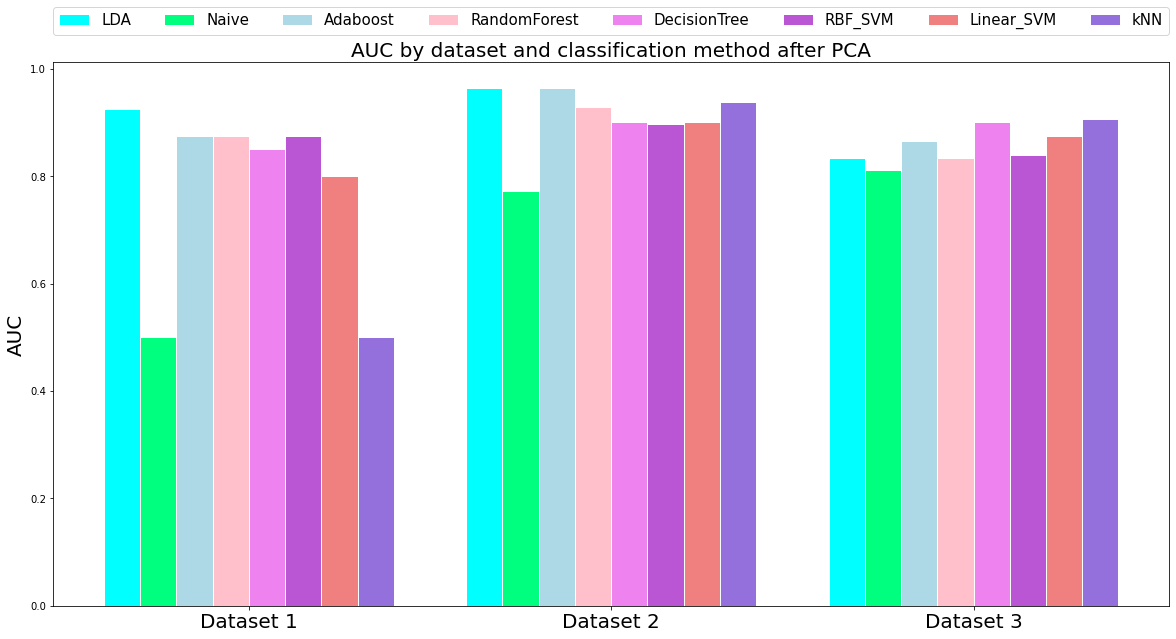

In [14]:
labels_p = ['dataset1', 'dataset2', 'dataset3']

K_nearest_p = [aucs_pca[0][0], aucs_pca[1][0], aucs_pca[2][0]]
Linear_SVM_p = [aucs_pca[0][1], aucs_pca[1][1], aucs_pca[2][1]]
RBF_SVM_p = [aucs_pca[0][2], aucs_pca[1][2], aucs_pca[2][2]]
Decision_Tree_p = [aucs_pca[0][3], aucs_pca[1][3], aucs_pca[2][3]]
Random_Forest_p = [aucs_pca[0][4], aucs_pca[1][4], aucs_pca[2][4]]
AdaBoost_p = [aucs_pca[0][5], aucs_pca[1][5], aucs_pca[2][5]]
Naive_Bayes_p = [aucs_pca[0][6], aucs_pca[1][6], aucs_pca[2][6]]
LDA_p = [aucs_pca[0][7], aucs_pca[1][7], aucs_pca[2][7]]

plt.figure(figsize=(20,10))

barWidth = 0.1
r1 = np.arange(len(LDA))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
r6 = [x + barWidth for x in r5]
r7 = [x + barWidth for x in r6]
r8 = [x + barWidth for x in r7]


plt.bar(r1, K_nearest_p, color='cyan', width=barWidth, edgecolor='white', label='LDA')
plt.bar(r2, Linear_SVM_p, color='springgreen', width=barWidth, edgecolor='white', label='Naive')
plt.bar(r3, RBF_SVM_p, color='lightblue', width=barWidth, edgecolor='white', label='Adaboost')
plt.bar(r4, Decision_Tree_p, color='pink', width=barWidth, edgecolor='white', label='RandomForest')
plt.bar(r5, Random_Forest_p, color='violet', width=barWidth, edgecolor='white', label='DecisionTree')
plt.bar(r6, AdaBoost_p, color='mediumorchid', width=barWidth, edgecolor='white', label='RBF_SVM')
plt.bar(r7, Naive_Bayes_p, color='lightcoral', width=barWidth, edgecolor='white', label='Linear_SVM')
plt.bar(r8, LDA_p, color='mediumpurple', width=barWidth, edgecolor='white', label='kNN')

 
plt.ylabel('AUC', fontsize = 20)
plt.title('AUC by dataset and classification method after PCA', fontsize=20)
plt.xticks([r + 0.35 for r in range(len(LDA))], ['Dataset 1', 'Dataset 2', 'Dataset 3'], fontsize=20)
plt.legend(bbox_to_anchor=(0., 1.05, 1., .102),loc=3,ncol=8, mode="expand", borderaxespad=0., fontsize = 15)
plt.show()

In [15]:
def plot_decision_boundary(clf, X, y): 
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    # Set up plotting mesh
    # Step size of the mesh
    h = .02 
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    # Perform classification
    X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=.4, random_state=42)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    # Plot the decision boundary. For that, we will assign a color to each

    # point in the mesh [x_min, x_max]x[y_min, y_max].
    if hasattr(clf, "decision_function"):
        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=cm, alpha=.8)

    # Plot the training points
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
               edgecolors='k', alpha=0.6)

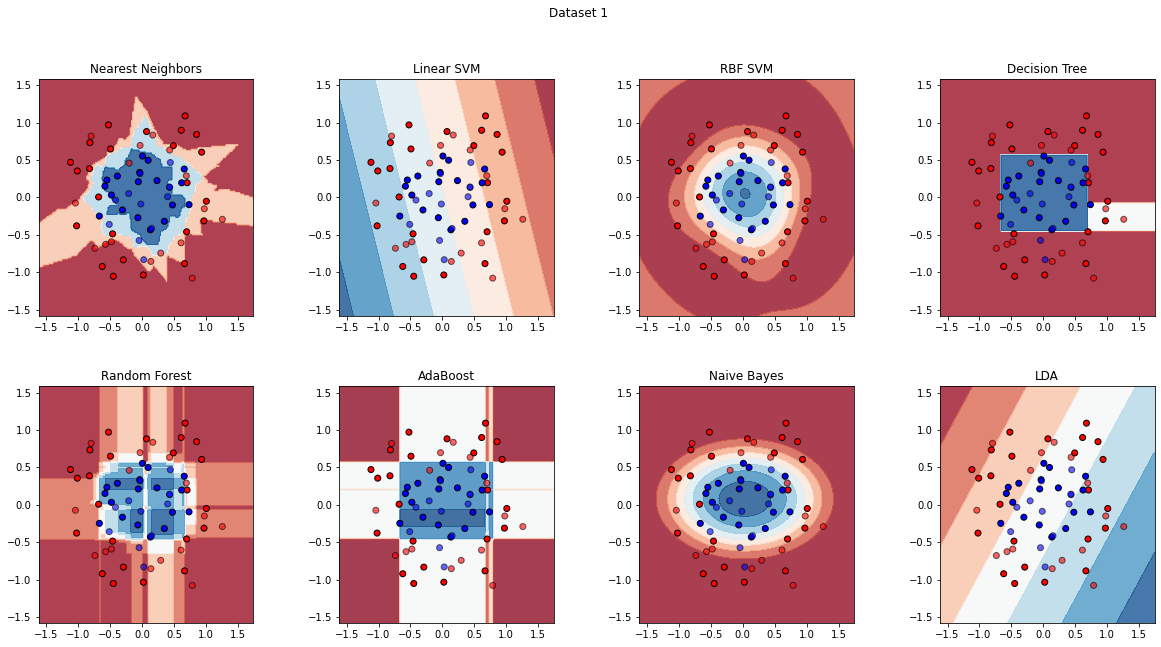

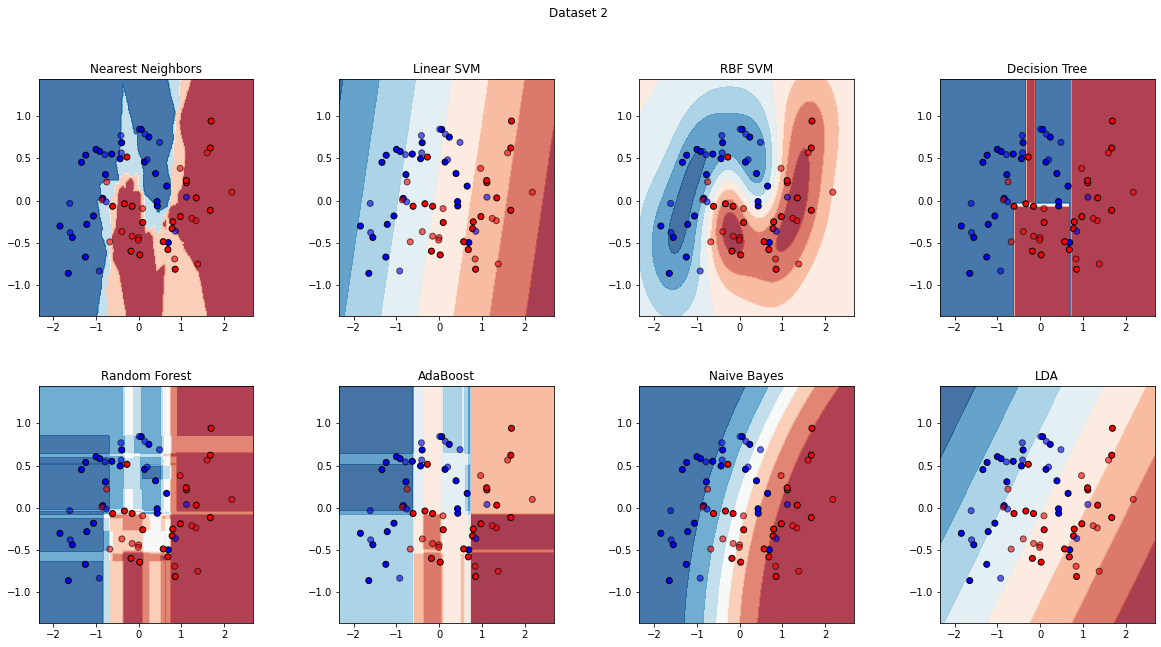

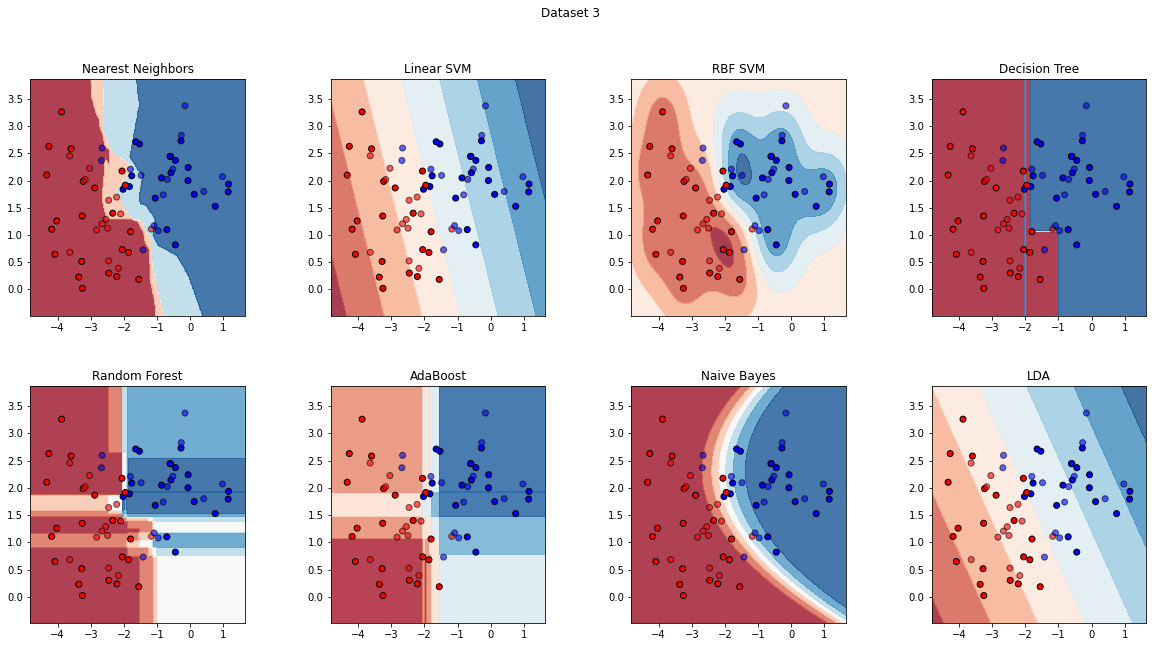

In [16]:
j = 1
for dataset in data_p:
    i = 0
    plt.figure(figsize=(20,10))
    grid = plt.GridSpec(2, 4, wspace=0.4, hspace=0.3)
    plt.suptitle('Dataset ' + str(j))
    aucs_per_dataset_pca = []
    X_train = dataset[0]
    y_train = dataset[2]
    for name in clfs:
        clf = clfs.get(name)
        plt.subplot(grid[int(i/4) , int(i%4)])
        plt.title(name)
        plot_decision_boundary(clf, X_train, y_train)
        i = i + 1
    plt.show()
    j = j + 1